# Pymaceuticals Inc.
---

### Analysis
- **Observation 1**: On average, mice that were treated with Capomulin and Ramicane seemed to have the best treatment response. As shown in the boxplot, mice on the Capomulin and Ramicane drug regimen had the smallest tumors at the end of their treatments on average.
- **Observation 2**: For mice that were selected for the Capomulin drug regimen, there is a direct correlation between their weight and average tumor volume. The more they weighed, the higher their average tumor volume was.
- **Observation 3**: Mice that were on the Ceftamin drug regimen treatment had the most sporadic data in terms on their final tumor volume. This is supported by the fact that Ceftamin had the largest IQR (15.58).

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.ticker as ticker
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
#Get number of unique Mouse IDs
unique_mice_count = combined_data['Mouse ID'].nunique()
unique_mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
#Get unique Mouse IDs in duplicate data
duplicate_mouse_id_timepoint = duplicate_data['Mouse ID'].unique()
#Display unique Mouse IDs in duplicate data
duplicate_mouse_id_timepoint

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_moused_id_data_output = combined_data.loc[combined_data['Mouse ID'] == 'g989']
#Display all the data for the duplicate mouse ID
duplicate_moused_id_data_output

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
final_data = combined_data.loc[combined_data['Mouse ID'] != 'g989']
#Display cleaned DataFrame that does not contain duplicate mouse g989
final_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
final_data_unique_count = final_data['Mouse ID'].nunique()
#Display number of mice in the cleaned DataFrame
final_data_unique_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Grouped data
drug_regimen_grouped_data = final_data.groupby('Drug Regimen')
#Calculate mean of Tumor Volume in grouped data
drug_regimen_grouped_data_mean = drug_regimen_grouped_data['Tumor Volume (mm3)'].mean()
#Calculate median of Tumor Volume in grouped data
drug_regimen_grouped_data_median = drug_regimen_grouped_data['Tumor Volume (mm3)'].median()
#Calculate variance of Tumor Volume in grouped data
drug_regimen_grouped_data_variance = drug_regimen_grouped_data['Tumor Volume (mm3)'].var()
#Calculate standard deviation of Tumor Volume in grouped data
drug_regimen_grouped_data_std_dev = drug_regimen_grouped_data['Tumor Volume (mm3)'].std()
#Calculate SEM of Tumor Volume in grouped data
drug_regimen_grouped_data_sem = drug_regimen_grouped_data['Tumor Volume (mm3)'].sem()

#Create DataFrame of mean, median, variance, standard deviation and SEM
drug_regimen_df = pd.DataFrame({
    'Mean Tumor Volume': drug_regimen_grouped_data_mean,
    'Median Tumor Volume': drug_regimen_grouped_data_median,
    'Tumor Volume Variance': drug_regimen_grouped_data_variance,
    'Tumor Volume Std. Dev.': drug_regimen_grouped_data_std_dev,
    'Tumor Volume Std. Err.': drug_regimen_grouped_data_sem
})
#Display DataFrame
drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_stats = drug_regimen_grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

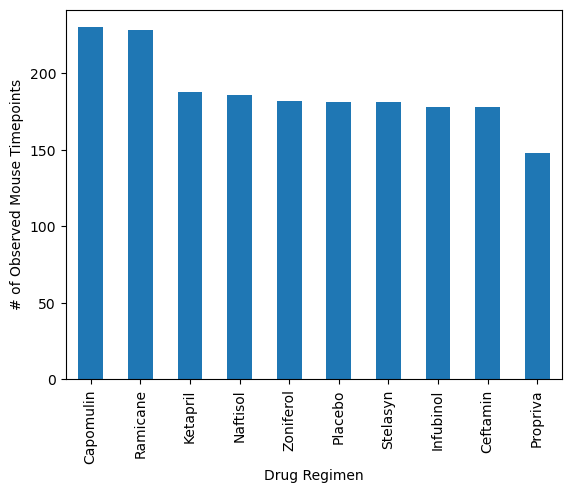

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Get count by drug regimen
drug_regimen_count = final_data['Drug Regimen'].value_counts()
#Create bar plot of drug_regimen_count and format bar plot
pandas_bar_plot = drug_regimen_count.plot.bar(xlabel = 'Drug Regimen', ylabel = '# of Observed Mouse Timepoints')

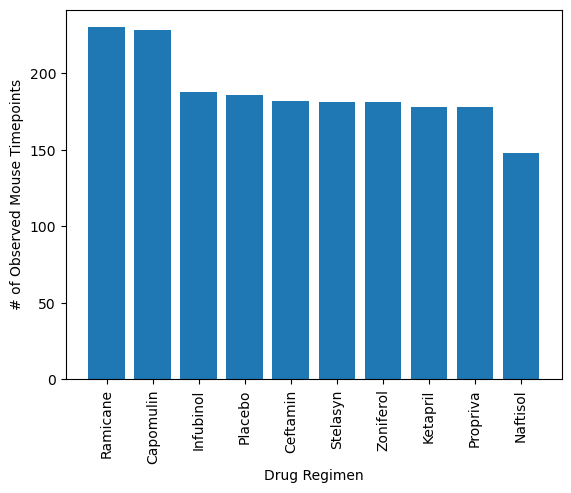

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Create x-axis data array
pyplot_x_axis = np.array(final_data['Drug Regimen'].unique())
#Create y-axis data array
pyplot_y_axis = np.array(final_data['Drug Regimen'].value_counts())
#Create pyplot bar chart
pyplot_bar_chart = plt.bar(pyplot_x_axis, pyplot_y_axis)
#Rotate x-ticks
plt.xticks(rotation=90)
#Add label to x-axis
plt.xlabel("Drug Regimen")
#Add label to y-axis
plt.ylabel("# of Observed Mouse Timepoints")
#Display pyplot bar chart
plt.show()

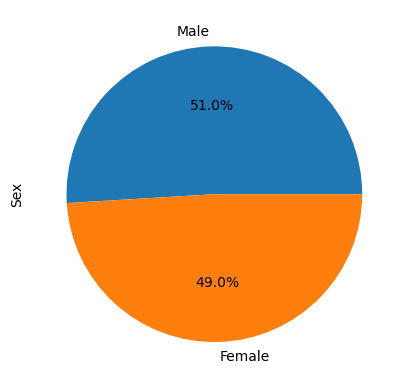

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Count of rows by sex
gender_count = final_data['Sex'].value_counts()
#Create Pandas pie chart and format values
pandas_pie_plot = gender_count.plot(kind='pie', autopct = '%1.1f%%')

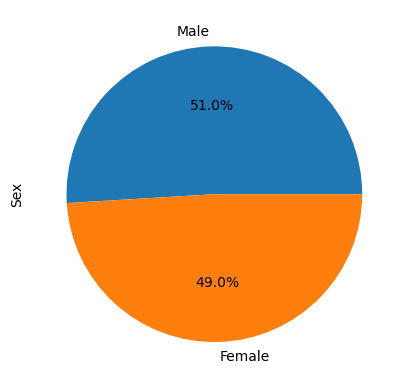

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Count of rows by sex
pyplot_pie_values = np.array(final_data['Sex'].value_counts())
#Get unique gender labels
gender_labels = np.array(final_data['Sex'].unique())
#Add label on side
plt.ylabel("Sex")
#Display pyplot pie chart and format chart
pyplot_pie_plot = plt.pie(pyplot_pie_values, labels = gender_labels, autopct = '%1.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_final_data = pd.merge(final_data, last_timepoint, how="inner", on=["Mouse ID", "Timepoint"]).reset_index()
#Display new DataFrame that only shows the max timepoint for each mouse
last_timepoint_final_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,45,22.050126,1
1,1,s185,Capomulin,Female,3,17,45,23.343598,1
2,2,x401,Capomulin,Female,16,15,45,28.484033,0
3,3,m601,Capomulin,Male,22,17,45,28.430964,1
4,4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
243,243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,244,z435,Propriva,Female,12,26,10,48.710661,0
245,245,z581,Infubinol,Female,24,25,45,62.754451,3
246,246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_filter = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Create new DataFrame that only contains data where Drug Regimen is in drug_regimen_filter list
last_timepoint_final_data_filtered = last_timepoint_final_data[last_timepoint_final_data['Drug Regimen'].isin(drug_regimen_filter)].reset_index()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers = []
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug_regimen in drug_regimen_filter:
    #Filter last_timepoint_final_data_filtered data based on each drug regimen
    tumor_vol_by_drug_regimen = last_timepoint_final_data_filtered.loc[last_timepoint_final_data_filtered['Drug Regimen'] == drug_regimen, 'Tumor Volume (mm3)']
    # add subset to tumor_vol_data empty list
    tumor_vol_data.append(tumor_vol_by_drug_regimen)
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug_regimen.quantile([.25,.5,.75])
    #Calculate lower quartile
    lowerq = quartiles[0.25]
    #Calculate upper quartile
    upperq = quartiles[0.75]
    #Calculate interquartile range
    iqr = upperq - lowerq
    #Calculate lower bound
    lower_bound = lowerq - (1.5*iqr)
    #Calculate upper bound
    upper_bound = upperq + (1.5*iqr)
    #Calculate outliers for each drug regimen. Outliers are greater than upper_bound and less than lower_bound
    outliers_by_drug_regimen = last_timepoint_final_data_filtered.loc[((last_timepoint_final_data_filtered['Drug Regimen'] == drug_regimen) \
    & ((last_timepoint_final_data_filtered['Tumor Volume (mm3)'] > upper_bound) | (last_timepoint_final_data_filtered['Tumor Volume (mm3)'] < lower_bound))), 'Tumor Volume (mm3)']
    #Add outliers to outliers empty list
    outliers = list(outliers_by_drug_regimen)
    #Display header
    print(f"{drug_regimen} Statistics")
    #Display lower quartile
    #print(f"Lower quartile: {lowerq}")
    #Display upper quartile
    #print(f"Upper quartile: {upperq}")
    #Display IQR
    print(f"Interquartile range: {iqr}")
    #Display lower bound
    #print(f"Lower bound: {lower_bound}")
    #Display upper bound
    #print(f"Upper bound: {upper_bound}")
    #Display outliers for each drug regimen
    print(f"Outliers: {outliers}")
    print(f"----------------------------------------")

Capomulin Statistics
Interquartile range: 7.781863460000004
Outliers: []
----------------------------------------
Ramicane Statistics
Interquartile range: 9.098536719999998
Outliers: []
----------------------------------------
Infubinol Statistics
Interquartile range: 11.477135160000003
Outliers: [36.3213458]
----------------------------------------
Ceftamin Statistics
Interquartile range: 15.577752179999997
Outliers: []
----------------------------------------


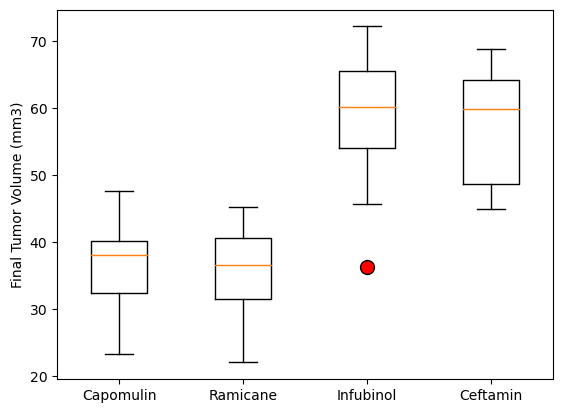

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Create and format box plot
plt.boxplot(tumor_vol_data, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'], flierprops={'markersize': 10, 'markerfacecolor': 'red'})
#Add y-axis label
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

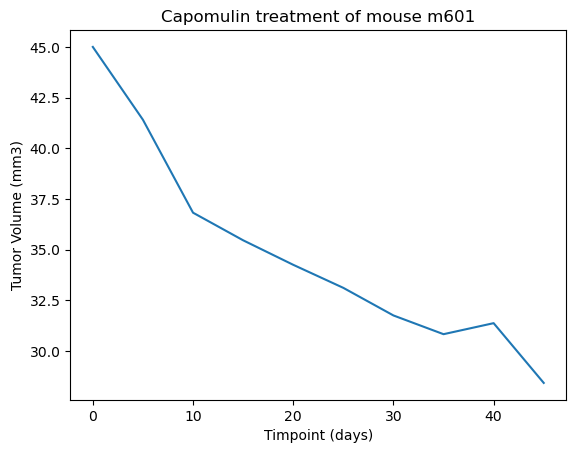

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Get data for a single mouse treated with Capomulin. Sample Mouse ID is m601
sample_mouse_id = 'm601'
capomulin_sample = final_data.loc[final_data['Mouse ID'] == sample_mouse_id].reset_index()
#Create list of m601's tumor volumes
capomulin_sample_tumor_volume = capomulin_sample['Tumor Volume (mm3)']
#Create list of m601's timepoints
capomulin_sample_timepoint = capomulin_sample['Timepoint']
#Create line plot showing m601's timepoint and tumor volume
plt.plot(capomulin_sample_timepoint, capomulin_sample_tumor_volume)
#Add y-axis label
plt.ylabel('Tumor Volume (mm3)')
#Add x-axis label
plt.xlabel('Timpoint (days)')
#Add title
plt.title(f'Capomulin treatment of mouse {sample_mouse_id}')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

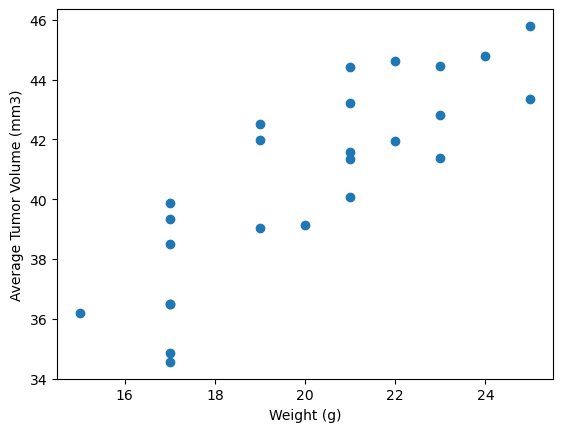

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Create filtered DataFrame where Drug Regimen equals Capomulin
capomulin_population = final_data.loc[final_data['Drug Regimen'] == 'Capomulin'].sort_values(by='Mouse ID')
#Group filtered DataFrame by Mouse ID
grouped_data = capomulin_population.groupby(['Mouse ID'])
#Calculate average tumor volume per Mouse ID
mouse_avg_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
#Merge mouse_avg_tumor_volume with original mouse_metadata
weight_merged_data = pd.merge(mouse_metadata, mouse_avg_tumor_volume, how="inner", on=["Mouse ID", "Mouse ID"]).sort_values(by='Mouse ID')
#Create list of Capomulin mice weight
mouse_weight = weight_merged_data['Weight (g)']
#Create scatter plot
plt.scatter(mouse_weight, mouse_avg_tumor_volume)
#Add x-axis label
plt.xlabel('Weight (g)')
#Add y-axis label
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


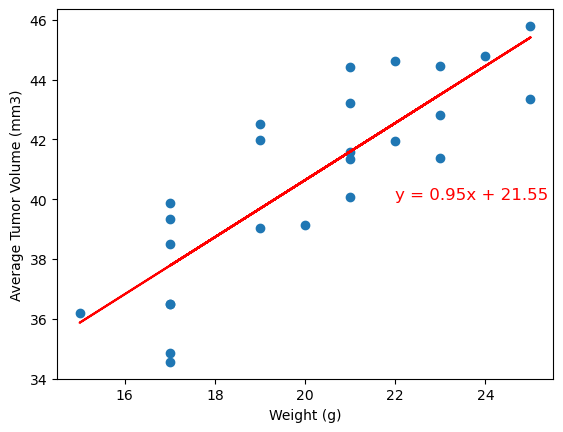

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Calculate correlation coefficient
correlation = st.pearsonr(mouse_weight, mouse_avg_tumor_volume)
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, mouse_avg_tumor_volume)
#Calculate regression line
regress_values = mouse_weight * slope + intercept
#Create line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Create scatter plot of mouse weight vs average tumor volume
plt.scatter(mouse_weight, mouse_avg_tumor_volume)
#Add regression line to scatter plot and format line
plt.plot(mouse_weight,regress_values,color="red")
#Add regression line equation and format
plt.annotate(line_eq,(22,40),fontsize=12,color="red")
#Add x-axis label
plt.xlabel('Weight (g)')
#Add y-axis label
plt.ylabel('Average Tumor Volume (mm3)')
#Print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
#Display scatter plot
plt.show()